<a href="https://colab.research.google.com/github/duiliod/PI/blob/main/TP1*_PI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deangeli Duilio Trabajo Practico 1 PI

TP1) 
La actividad consiste en: 
Métodos para abrir una imagen de un archivo y disponer la información en una componente imagen. (tamaño, canales, formato, etc)
Métodos para guardar la información de una componente imagen a un archivo.
Métodos para acceder a una componente imagen y leer o modificar su contenido.
Métodos para graficar o modificar una componente imagen.
Observaciones: se busca que desarrollen un código que permita abrir una imagen, conocer las características de esta, luego modificarla mediante alguna alteración en los canales RGB, graficarla y luego guardar el resultado como una imagen nueva.

In [44]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image 
from skimage import data

In [71]:
def open_image(filepath):
  image = Image.open(filepath)
  return image

def get_info(image):
  print("format {}".format(image.format))
  print("mode {}".format(image.mode))
  print("width {} height {}".format(image.size[0], image.size[1]))

def save_image (image, filepath):
  image.save(filepath)

def change_rgb (image, R_value, G_value, B_value):
  image = image.convert('RGB')

  # Split into 3 channels
  r, g, b = image.split()

  r = r.point(lambda i: i * R_value)
  g = g.point(lambda i: i *G_value)
  b = b.point(lambda i: i *B_value)

  # Recombine back to RGB image
  return Image.merge('RGB', (r, g, b))



def plot_image (image):
  plt.imshow(image)
  plt.show()

def plot_two_images(image1, image2):
  fig, axes = plt.subplots(1, 2, figsize=(8, 4))
  ax = axes.ravel() 

  ax[0].imshow(image1)
  ax[0].set_title("Original")
  ax[1].imshow(image2, cmap=plt.cm.gray)
  ax[1].set_title("Altered")

  fig.tight_layout()
  plt.show()

In [72]:
svm_image = open_image('/content/hardmargin.jpg')

In [73]:
get_info(svm_image)

format JPEG
mode RGB
width 550 height 547


In [63]:
save_image(svm_image, '/content/svm.jpg')

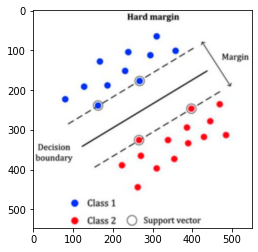

In [74]:
plot_image(svm_image)

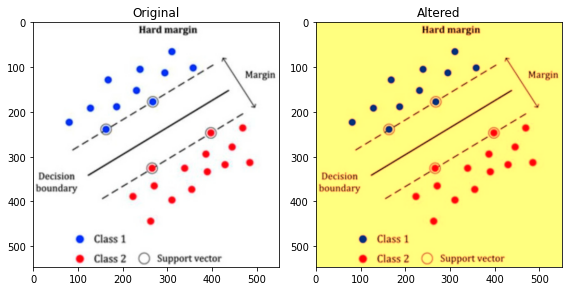

In [75]:
new_image_svm = change_rgb(svm_image, 1.5,1,0.5)
plot_two_images(svm_image,new_image_svm)

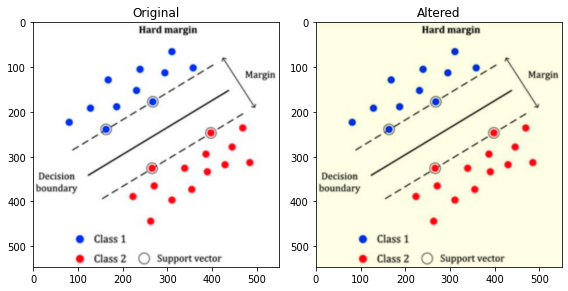

In [80]:
#@title Changing RGB channels {run:"auto"}


R = 1 #@param {type:"slider", min:0, max:2, step:0.1}
G = 1 #@param {type:"slider", min:0, max:2, step:0.1}
B = 0.9 #@param {type:"slider", min:0, max:2, step:0.1}

new_image_svm = change_rgb(svm_image, R,G,B)
plot_two_images(svm_image,new_image_svm)

In [ ]:
save_image(new_image_svm, '/content/new_image_svm.jpg')